In [11]:
#Librerías
import torch
from torch import nn
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime as dt
import pandas as pd
import yfinance as yf

In [52]:
#Definición de dataframe con respecto al SP 500
sp500= pd.read_html("https://en.wikipedia.org/wiki/List_of_S%26P_500_companies")[0]
sp500["Symbol"] = sp500["Symbol"].str.replace(".", "-")
symbols_list= sp500["Symbol"].unique().tolist()
end_date= "2023-09-27"
start_date= pd.to_datetime(end_date)-pd.DateOffset(365*8)
df=yf.download(tickers= symbols_list,
               start= start_date,
               end= end_date)

[*********************100%%**********************]  503 of 503 completed
ERROR:yfinance:
3 Failed downloads:
ERROR:yfinance:['SOLV', 'GEV', 'VLTO']: Exception("%ticker%: Data doesn't exist for startDate = 1443499200, endDate = 1695787200")


In [74]:
#Elección de stock para analizar y precio de cierre
X=torch.arange(2012)
Y=torch.tensor(df[('Adj Close',    'A')].values)
len(X), len(Y)

(2012, 2012)

In [115]:
#Dvisión  de datos para entrenamiento y test
train_split= int(0.8*len(X))
X_train, y_train = X[: train_split], Y[: train_split]
X_test, y_test = X[train_split:1950], Y[train_split:1950]

In [116]:
#Modelo de regresión lineal
class LinearRegressionModel(nn.Module):  # Almost everything in Pytorch inherits from nn.Module
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    # Forward method to define the computation in the model
    def forward(self, x: torch.Tensor):
        return self.weights * x + self.bias


#Algorithms: gradient descent, and backpropagation

In [117]:
#Función para analizar cambios en el precio de cierre
def plot_predict (train_data= X_train,
                  train_labels=y_train,
                  test_data= X_test,
                  test_labels= y_test,
                  predictions= None
                  ):
  plt.figure(figsize= (10, 7))
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
  plt.legend(prop={"size": 14});

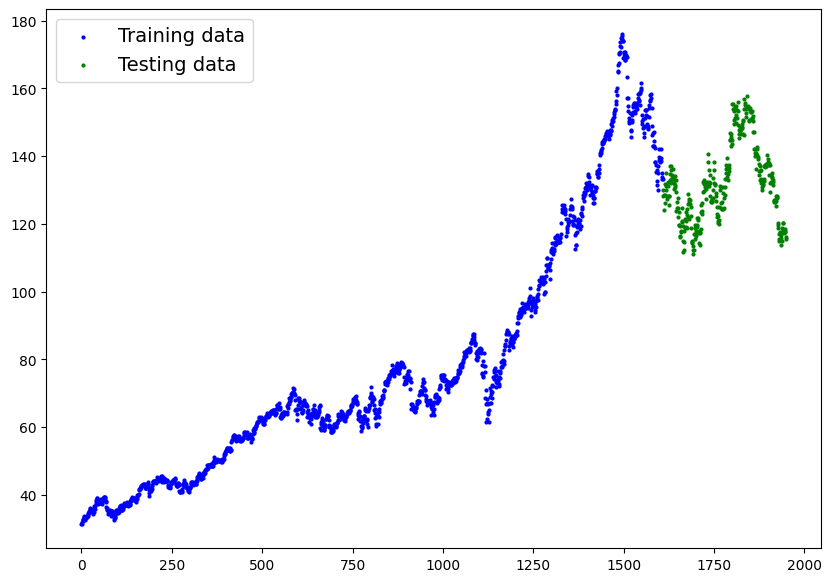

In [118]:
#Instancia del modelo
torch.manual_seed(42)
model_0=LinearRegressionModel()
list(model_0.parameters())
plot_predict(X_train)

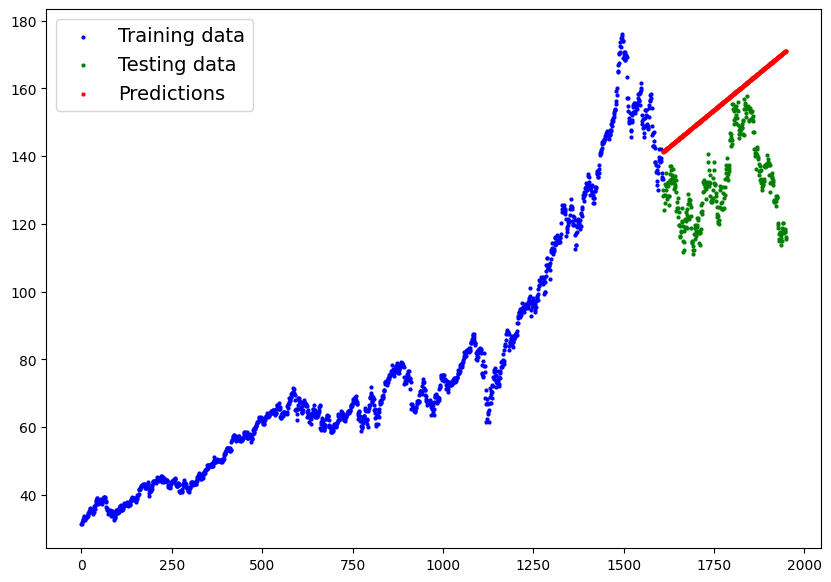

In [121]:
# Entrenamiento del modelo
#Función de pérdida
loss_fn= nn.L1Loss()
#Optimizador
optimizer= torch.optim.SGD(params=model_0.parameters(), lr=0.000001)
#Ciclo de entrenamiento
epochs=500
for epoch in range(epochs):
  model_0.train()
  y_pred= model_0(X_train)
  loss = loss_fn(y_pred, y_train )
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_0.eval()
#Prueba de regresión
with torch.inference_mode():
  y_preds= model_0(X_test)
plot_predict(predictions=y_preds)